By BHUVANA.U

Task no.1:-Predict the percentage of marks of an student based on the number of study hours

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
url= 'http://bit.ly/w-data'
dataset= pd.read_csv(url)
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


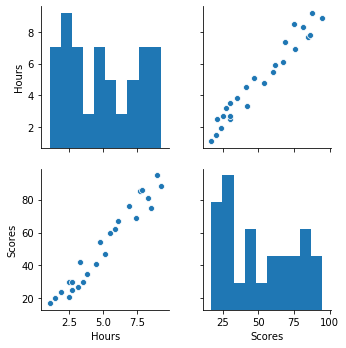

In [4]:
sns.pairplot(dataset)

In [5]:
x= dataset.iloc[:,0:1]
x.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [6]:
y= dataset.iloc[:,1:]
y.head()

,Scores
0,21
1,47
2,27
3,75
4,30


In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(20, 1) (20, 1) (5, 1) (5, 1)


In [8]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(x_train, y_train)
predictions= model.predict(x_test)

In [9]:
comparison= pd.DataFrame(np.c_[y_test, predictions],columns=['Original Score','Predictions'])
comparison


,Original Score,Predictions
0,41.0,46.054565
1,17.0,11.890227
2,42.0,33.996564
3,30.0,25.957896
4,47.0,52.083566


In [10]:
from sklearn import metrics
print('MSE:',metrics.mean_squared_error(y_test, predictions))
print('MAE:',metrics.mean_absolute_error(y_test, predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MSE: 31.578931277386836
MAE: 5.458689019494495
RMSE: 5.619513437779719


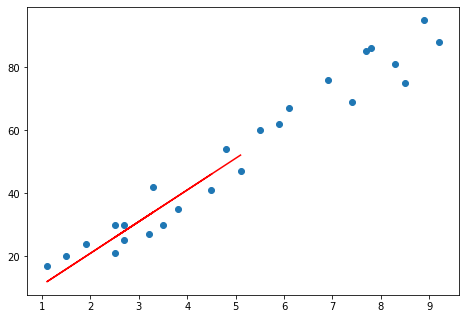

In [11]:
fig= plt.figure()
axes= fig.add_axes([0,0,1,1])
axes.scatter(x,y)
axes.plot(x_test,predictions,color='red')

In [12]:
A= model.predict([[9.5]])
print('If student studies 9.5 hrs/day he would get {} percentage.'.format(A[0][0]))

If student studies 9.5 hrs/day he would get 96.29623920095065 percentage.
